<a href="https://colab.research.google.com/github/Hayyin26/PCVK_Ganjil_25-26/blob/main/JS05_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

# 1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


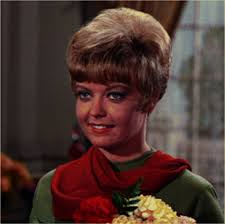

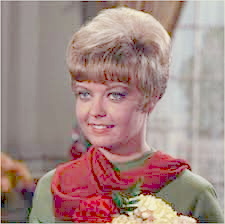

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka!')
    gamma = 1.0

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/female.jpeg')
img_float = img / 255.0

# Rumus gamma correction
gamma_corrected = np.power(img_float, 1/gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

# Tampilkan hasil
cv2_imshow(img)
cv2_imshow(gamma_corrected)


# 2. Buat Simulasi Image Depth

Masukkan nilai bit depth (1-7): 2


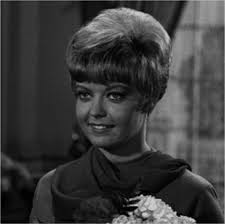

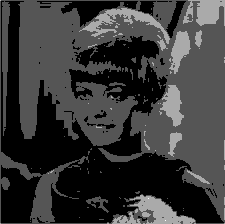

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

bit_depth = int(input('Masukkan nilai bit depth (1-7): '))
level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpeg', cv.IMREAD_GRAYSCALE)
depth_image = np.round(original / level) * level
depth_image = np.uint8(depth_image)

cv2_imshow(original)
cv2_imshow(depth_image)


# 3. Buat modul Average Denoising

In [16]:
import cv2 as cv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from google.colab import drive

# PERSIAPAN AWAL
# Selalu mount drive untuk memastikan koneksi
drive.mount('/content/drive')

# Tentukan semua path yang dibutuhkan di awal
base_path = "/content/drive/MyDrive/PCVK"
img_path_original = os.path.join(base_path, "galaxy.jpeg")
noises_folder_path = os.path.join(base_path, "noises")

# BAGIAN 1: PEMBUATAN GAMBAR NOISE SECARA OTOMATIS

print("=== Memeriksa Kebutuhan Gambar Praktikum ===")

original_img = cv.imread(img_path_original)

if original_img is None:
    print(f"!! ERROR: Gambar asli 'galaxy.jpeg' tidak ditemukan di {base_path}")
    print("!! Pastikan file galaxy.jpg sudah ada sebelum melanjutkan.")
else:
    if not os.path.exists(noises_folder_path):
        print(f"Folder 'noises' tidak ditemukan. Membuat folder dan 100 gambar noise...")
        os.makedirs(noises_folder_path) # Buat folder

        # Proses pembuatan 100 gambar noise
        for i in range(100):
            noisy_image = original_img.copy()
            mean = 0
            var = 100
            sigma = var**0.5
            gaussian_noise = np.random.normal(mean, sigma, original_img.shape)
            noisy_image = cv.add(noisy_image.astype(np.float64), gaussian_noise)
            noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
            cv.imwrite(os.path.join(noises_folder_path, f"noise_{i+1:03d}.jpg"), noisy_image)

        print("Selesai! 100 gambar noise berhasil dibuat.")
    else:
        print("Folder 'noises' sudah ada. Proses pembuatan gambar dilewati.")

    # BAGIAN 2: PROSES AVERAGE DENOISING DAN PLOTTING

    print("\n=== Memulai Proses Average Denoising ===")

    # Muat semua gambar dari folder noises
    img_path_noise = os.path.join(noises_folder_path, "*.jpg")
    cv_img = [cv.imread(file) for file in glob.glob(img_path_noise)]

    if not cv_img:
        print("!! ERROR: Gagal memuat gambar dari folder 'noises' meskipun folder ada.")
    else:
        print(f"Berhasil memuat {len(cv_img)} gambar noise dan 1 gambar asli.")

        def PSNR(original, processed):
            mse = np.mean((original.astype(np.float64) - processed.astype(np.float64)) ** 2)
            if mse == 0: return 100
            max_pixel = 255.0
            return 20 * np.log10(max_pixel / np.sqrt(mse))

        jumlah_citra = [5, 10, 20, 40, 80, 100]
        hasil_gambar = {}

        print("Memproses gambar dan menghitung PSNR...")
        for n in jumlah_citra:
            imgs_to_average = cv_img[:n]
            sum_img = np.sum([img.astype(np.float64) for img in imgs_to_average], axis=0)
            avg_img = np.uint8(sum_img / n)
            hasil_gambar[n] = avg_img
            psnr_value = PSNR(original_img, avg_img)
            print(f"PSNR dengan {n} gambar: {psnr_value:.2f} dB")

        # Tampilkan plot perbandingan
        sample_noise_img = cv_img[0]
        fig, axes = plt.subplots(len(jumlah_citra), 3, figsize=(12, 24))
        fig.suptitle("Perbandingan Denoising: ", fontsize=20)

        for i, n in enumerate(jumlah_citra):
            img_hasil = hasil_gambar[n]
            psnr_val = PSNR(original_img, img_hasil)

            axes[i, 0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
            axes[i, 0].set_title(f"Gambar Asli")
            axes[i, 0].axis('off')

            axes[i, 1].imshow(cv.cvtColor(sample_noise_img, cv.COLOR_BGR2RGB))
            axes[i, 1].set_title(f"Contoh Gambar Noise")
            axes[i, 1].axis('off')

            axes[i, 2].imshow(cv.cvtColor(img_hasil, cv.COLOR_BGR2RGB))
            axes[i, 2].set_title(f"Rata-rata {n} Gambar\nPSNR: {psnr_val:.2f} dB")
            axes[i, 2].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Memeriksa Kebutuhan Gambar Praktikum ===
Folder 'noises' sudah ada. Proses pembuatan gambar dilewati.

=== Memulai Proses Average Denoising ===
!! ERROR: Gagal memuat gambar dari folder 'noises' meskipun folder ada.


Kesimpulan: dari hasil yang diperoleh, dapat disimpulkan bahwa metode average denoising sangat efektif dalam mengurangi noise pada citra. Efektivitas ini terlihat dari peningkatan nilai PSNR yang terjadi secara konsisten seiring bertambahnya jumlah gambar yang dirata-ratakan, yaitu meningkat dari 37,48 dB saat menggunakan 5 gambar menjadi 42,34 dB ketika menggunakan 100 gambar. Peningkatan nilai PSNR tersebut menunjukkan bahwa kualitas gambar hasil pemrosesan semakin baik dan semakin mendekati kondisi gambar aslinya yang bersih. Selain itu, hasil data juga memperlihatkan adanya efek diminishing returns, di mana peningkatan kualitas paling besar terjadi pada tahap awal, sementara penambahan jumlah gambar di tahap akhir hanya memberikan peningkatan yang lebih kecil.

#4. Buat image masking untuk image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


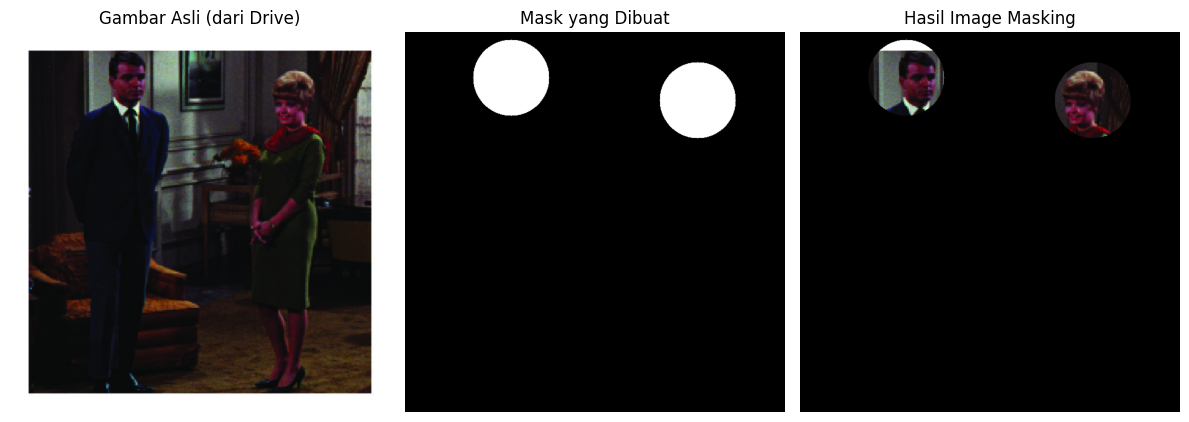

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

# Path ke gambar asli di dalam Drive
img_path = '/content/drive/MyDrive/PCVK/Couple.png'
img = cv.imread(img_path)

if img is None:
    print(f"ERROR: Gagal memuat gambar dari path: {img_path}")
    print("Pastikan path sudah benar!")
else:
    # Konversi warna ke RGB agar tampil benar di Matplotlib
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # LANGKAH 1: MEMBUAT MASK
    # Buat kanvas hitam seukuran gambar asli
    mask = np.zeros(img.shape[:2], dtype="uint8")
    height, width = img.shape[:2]

    center_kiri = (int(width * 0.28), int(height * 0.12))
    center_kanan = (int(width * 0.77), int(height * 0.18))
    radius = int(height * 0.10)

    cv.circle(mask, center_kiri, radius, 255, -1)
    cv.circle(mask, center_kanan, radius, 255, -1)

        # LANGKAH 2: MENERAPKAN MASK
    # Gunakan operasi bitwise AND
    masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

    # LANGKAH 3: MENAMPILKAN HASIL
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Gambar Asli (dari Drive)')
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask yang Dibuat')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Hasil Image Masking')
    plt.imshow(masked_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [9]:
# NOT
not_img = cv.bitwise_not(img)

# OR
or_img = cv.bitwise_or(img, mask)

# AND
and_img = cv.bitwise_and(img, mask)

# NAND
nand_img = cv.bitwise_not(and_img)

# XOR
xor_img = cv.bitwise_xor(img, mask)

cv2_imshow(not_img)
cv2_imshow(or_img)
cv2_imshow(and_img)
cv2_imshow(nand_img)
cv2_imshow(xor_img)


error: OpenCV(4.12.0) /io/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'
